<a href="https://colab.research.google.com/github/Wirtix/machine-learning-bootcamp/blob/main/Eliminacja_Wsteczna_OWNWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set()
np.random.seed(42)
np.set_printoptions(precision=4, suppress=True)
sklearn.__version__

'1.2.2'

In [6]:
df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [12]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['sex', 'smoker', 'region']

In [15]:
for col in cat_cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.6 KB


In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: ylabel='sex'>

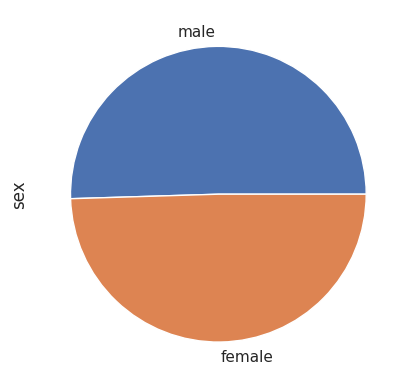

In [17]:
df.sex.value_counts().plot(kind="pie")

In [20]:
import plotly.express as px

px.histogram(df, x='charges', width=700, height=400, nbins=50, facet_col='smoker', facet_row='sex')

In [21]:
px.histogram(df, x='smoker', width=700, height=400, nbins=50, facet_col='sex', color='sex')

In [22]:
df_dummies = pd.get_dummies(df,drop_first=True)
df_dummies

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [28]:

corr = df_dummies.corr()
corr


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109344,0.041536,0.298308,-0.019814,-0.025587,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,0.046397,0.003746,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,0.017848,0.007331,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,0.058044,0.787234,-0.038695,0.073578,-0.043637
sex_male,-0.019814,0.046397,0.017848,0.058044,1.000000,0.076596,-0.012482,0.017578,-0.003767
smoker_yes,-0.025587,0.003746,0.007331,0.787234,0.076596,1.000000,-0.036321,0.068282,-0.037168
region_northwest,0.001495,-0.136138,0.026044,-0.038695,-0.012482,-0.036321,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.270057,-0.023492,0.073578,0.017578,0.068282,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.006211,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.346614,1.000000


<Axes: >

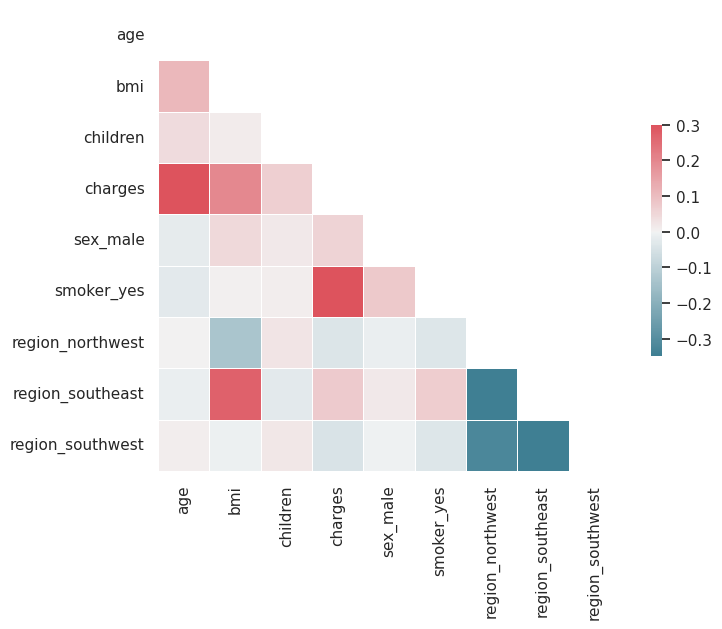

In [30]:
sns.set(style="white")
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
df_dummies.corr()['charges'].sort_values(ascending=False)


charges             1.000000
smoker_yes          0.787234
age                 0.298308
bmi                 0.198401
region_southeast    0.073578
children            0.067389
sex_male            0.058044
region_northwest   -0.038695
region_southwest   -0.043637
Name: charges, dtype: float64

<Axes: >

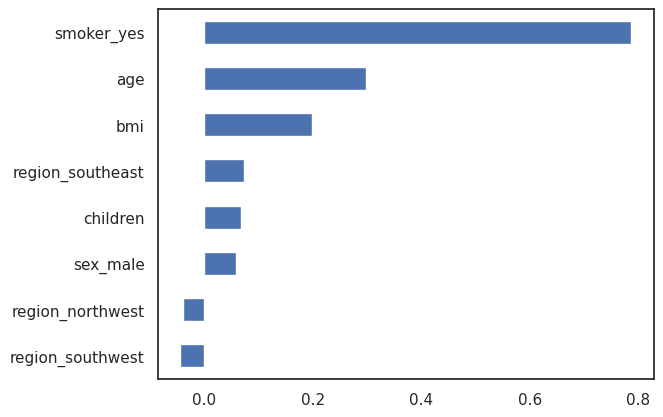

In [32]:
df_dummies.corr()['charges'].sort_values()[:-1].plot(kind='barh')


In [33]:
data = df_dummies.copy()
target = data.pop('charges')
data

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [34]:
target


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,target, test_size = 0.2)

In [39]:
print(f'X_trian shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_trian shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_trian shape: (1069, 8)
X_test shape: (268, 8)
y_trian shape: (1069,)
y_test shape: (268,)


In [42]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
print(f'R2 score: {regressor.score(X_test, y_test)}')

R2 score: 0.7399549415931634


In [47]:
y_pred = regressor.predict(X_test)
y_pred[:10]

array([ 2287.6214,  3141.4185,  1248.4128,  5358.1969,  4748.5289,
       39792.3581, 27558.0455,  3104.0174,  3679.5305, 33228.2893])

In [48]:
y_true = y_test.copy()

In [49]:
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true']-predictions['y_pred']
predictions

,y_true,y_pred,error
822,1621.88270,2287.621435,-665.738735
430,23082.95533,3141.418505,19941.536825
791,1252.40700,1248.412770,3.994230
408,6652.52880,5358.196892,1294.331908
181,1631.82120,4748.528891,-3116.707691
...,...,...,...
433,12638.19500,12841.097877,-202.902877
1248,1633.96180,5278.570497,-3644.608697
1305,2464.61880,2655.232421,-190.613621
863,5458.04645,3865.053061,1592.993389


<Axes: ylabel='Frequency'>

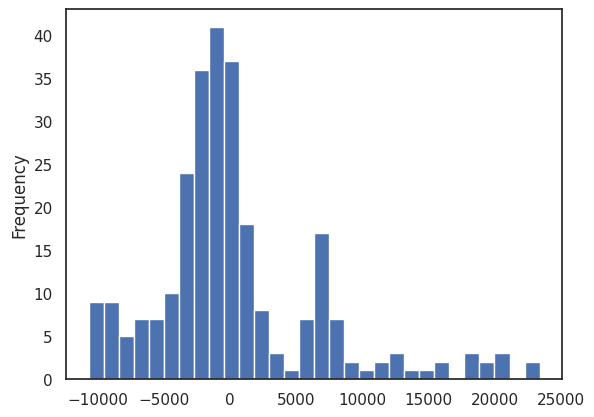

In [50]:
predictions.error.plot(kind ='hist',bins=30)

In [51]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true,y_pred)
print(mae)

4336.584321499884


In [52]:
regressor.intercept_

-12216.344892422187

In [53]:
regressor.coef_

array([  256.8791,   344.1829,   480.2587,   -62.5121, 23702.5064,
        -473.2569,  -834.2698,  -852.8799])

#eliminacja wsteczna


In [55]:
import statsmodels.api as sm

X_train_ols = X_train.copy()
X_train_ols = X_train_ols.values
X_train_ols = sm.add_constant(X_train_ols)
X_train_ols


array([[ 1.   , 20.   , 33.   , ...,  0.   ,  0.   ,  1.   ],
       [ 1.   , 54.   , 31.9  , ...,  0.   ,  1.   ,  0.   ],
       [ 1.   , 58.   , 41.91 , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [ 1.   , 18.   , 23.085, ...,  0.   ,  0.   ,  0.   ],
       [ 1.   , 24.   , 26.79 , ...,  1.   ,  0.   ,  0.   ],
       [ 1.   , 23.   , 37.1  , ...,  0.   ,  0.   ,  1.   ]])

In [57]:
ols = sm.OLS(endog=y_train, exog=X_train_ols).fit()
predictors = ['const'] + list(X_train.columns)
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     404.9
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          5.68e-316
Time:                        13:45:59   Log-Likelihood:                -10811.
No. Observations:                1069   AIC:                         2.164e+04
Df Residuals:                    1060   BIC:                         2.168e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.222e+04   1095.085  

In [60]:
X_selected = X_train_ols[:,[0,1,2,3,5,6,7,8]]
predictors.remove('sex_male')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     463.1
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          2.58e-317
Time:                        13:48:50   Log-Likelihood:                -10811.
No. Observations:                1069   AIC:                         2.164e+04
Df Residuals:                    1061   BIC:                         2.168e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.224e+04   1082.247  

In [61]:
X_selected = X_train_ols[:,[0,1,2,3,5,7,8]]
predictors.remove('region_northwest')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     540.3
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          1.62e-318
Time:                        13:49:36   Log-Likelihood:                -10811.
No. Observations:                1069   AIC:                         2.164e+04
Df Residuals:                    1062   BIC:                         2.167e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.248e+04   1051.837  

In [62]:
X_selected = X_train_ols[:,[0,1,2,3,5,8]]
predictors.remove('region_southeast')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     647.5
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          1.44e-319
Time:                        13:50:34   Log-Likelihood:                -10812.
No. Observations:                1069   AIC:                         2.164e+04
Df Residuals:                    1063   BIC:                         2.167e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.235e+04   1047.900  

In [63]:
X_selected = X_train_ols[:,[0,1,2,3,5]]
predictors.remove('region_southwest')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     809.3
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          7.50e-321
Time:                        13:50:47   Log-Likelihood:                -10812.
No. Observations:                1069   AIC:                         2.163e+04
Df Residuals:                    1064   BIC:                         2.166e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.244e+04   1043.619    -11.923      0.0

In [68]:
X_train_numpy = X_train.values
X_train_numpy = sm.add_constant(X_train_numpy)
num_vars = len(X_train_numpy[0])

predictors = ['const'] + list(X_train.columns)
sl = 0.05

for i in range(0, num_vars):
    ols = sm.OLS(endog=y_train, exog=X_train_numpy).fit()
    max_pval = max(ols.pvalues.astype('float'))
    if max_pval > sl:
        for j in range(0, num_vars - i):
            if ols.pvalues[j].astype('float') == max_pval:
                X_train_numpy = np.delete(X_train_numpy, j, axis=1)
                predictors.remove(predictors[j])

print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     809.3
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          7.50e-321
Time:                        13:59:11   Log-Likelihood:                -10812.
No. Observations:                1069   AIC:                         2.163e+04
Df Residuals:                    1064   BIC:                         2.166e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.244e+04   1043.619    -11.923      0.0